In [26]:
#importamos las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree


import warnings

warnings.filterwarnings('ignore')


In [27]:
datos = pd.read_csv("diabetes.csv")

#revisamos la estructura del dataset, revisamos si debemos realizar algun tratamiento a los datos
datos.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
print('Cantidad de datos:')
print(datos.shape)

Cantidad de datos:
(768, 9)


In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
#revisamos que no existan datos faltantes
print('Datos Faltantes:')
print(pd.isnull(datos).sum())

Datos Faltantes:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [43]:
#Seleccionar las columnas de caracteristicas y la columna de etiquetas 

# Variables predictoras
X= datos.iloc[:,:-1]

# Variables a predecir
Y= datos.iloc[:,-1]

X.head()




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [49]:
#Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=0)

arbol= DecisionTreeClassifier(max_depth=5)
arbol_diabetis=arbol.fit(X_train, Y_train)

#evaluar el modelo con el conjunto de datos de prueba
score = arbol.score(X_test,Y_test)
print("Accuracy:%.2f%%" %(score * 100.0))

Accuracy:78.12%


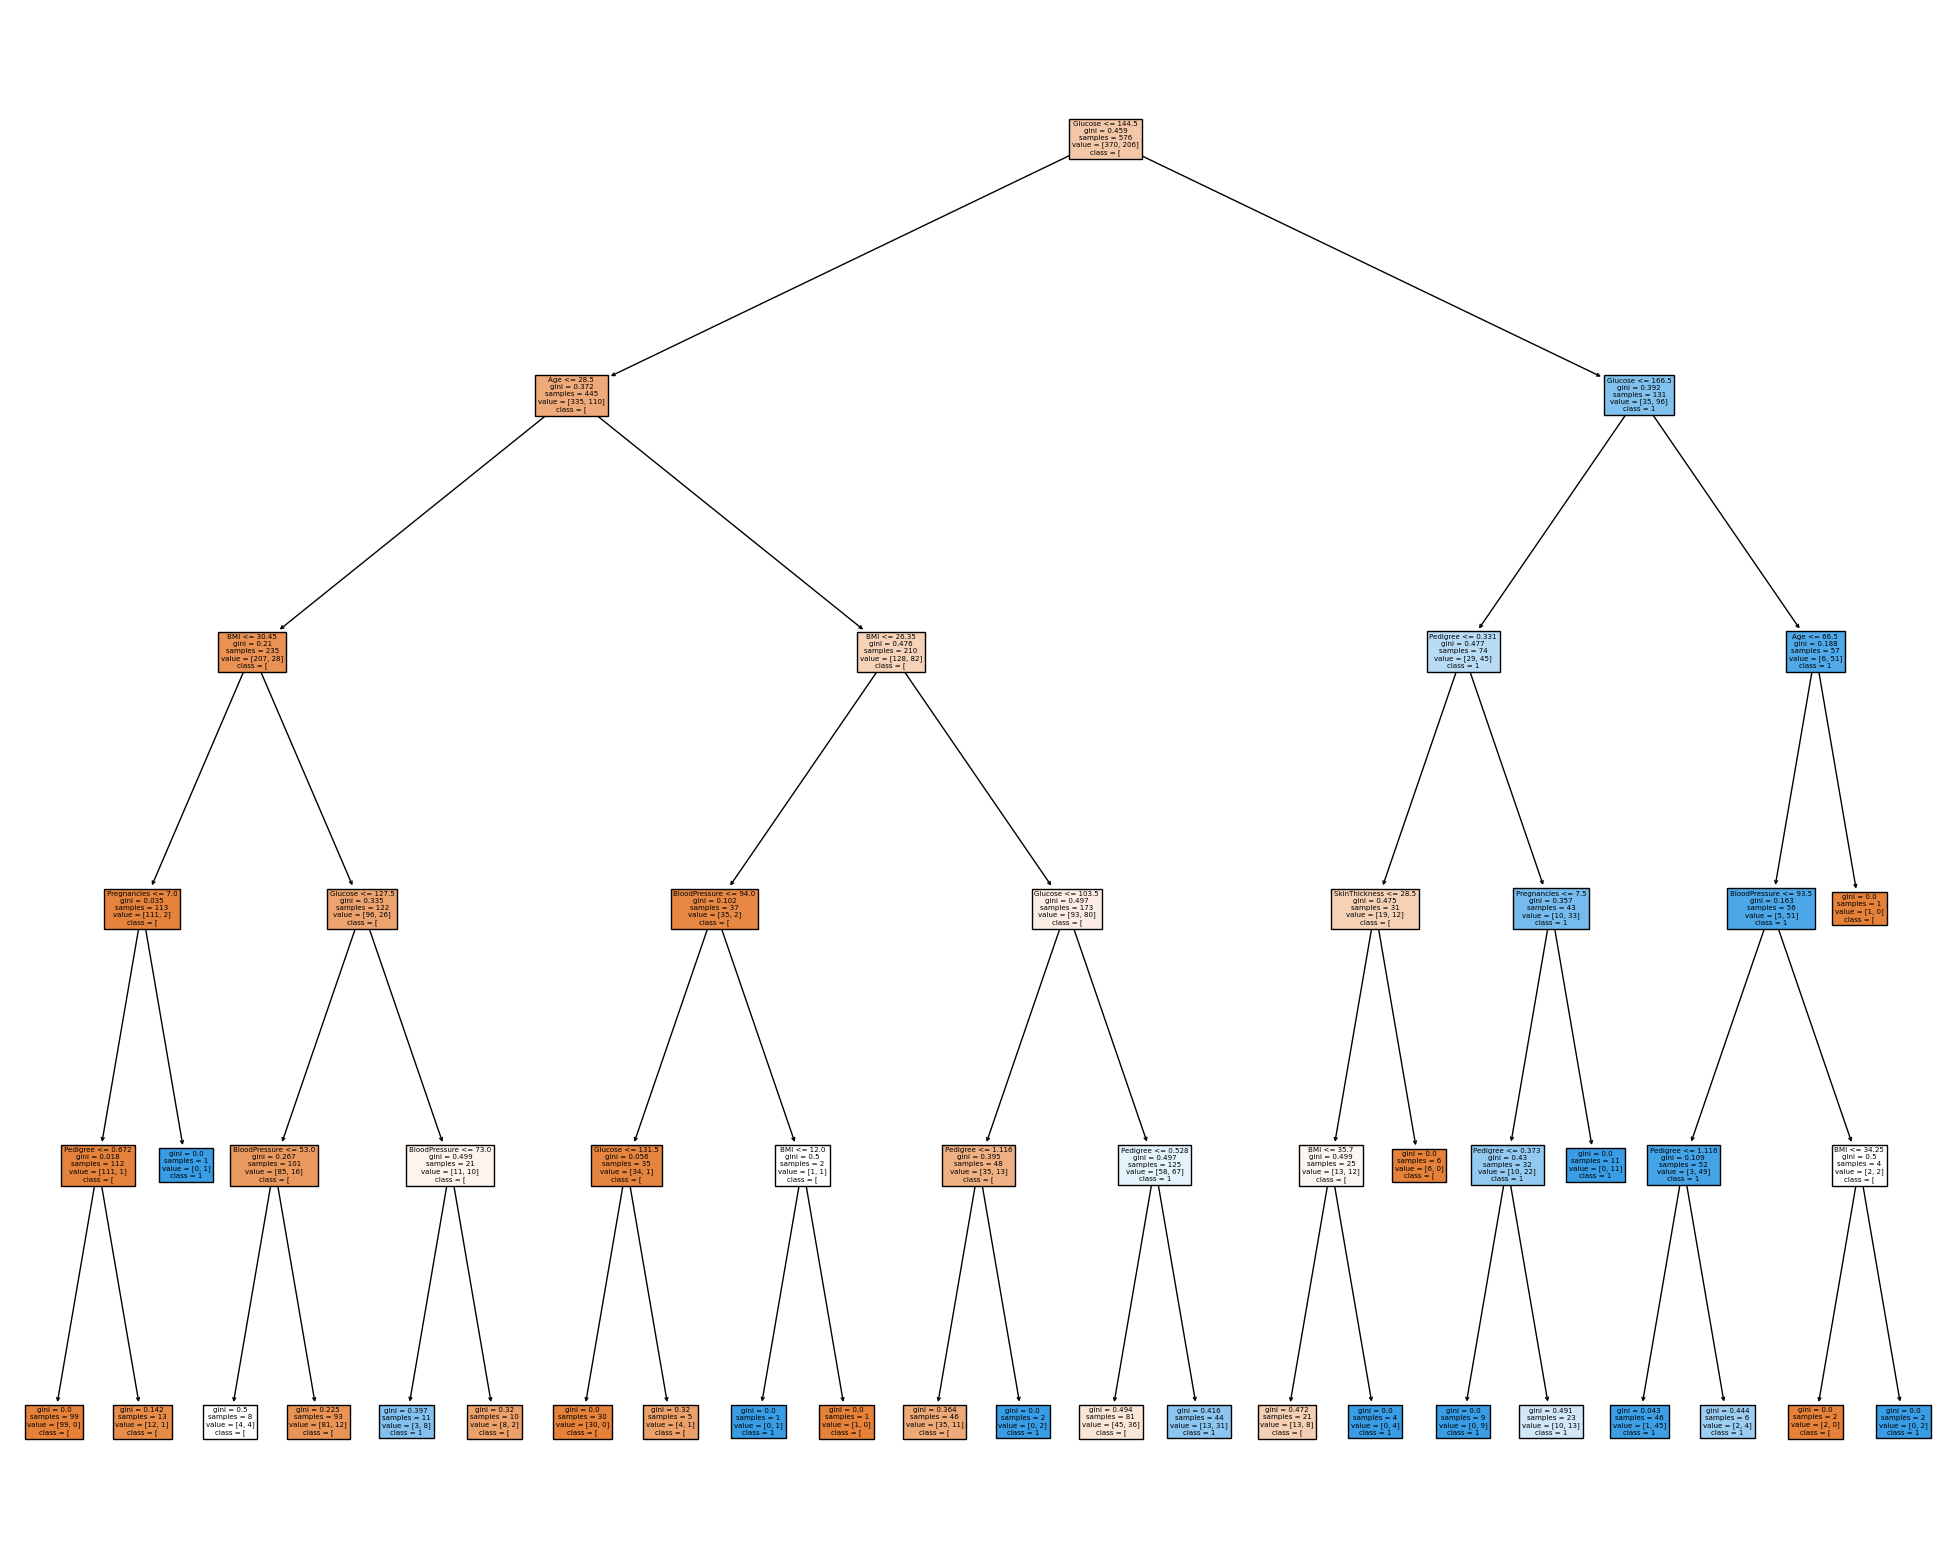

In [50]:
fig = plt.figure(figsize=(25,20)) #dimensiones del grafico
tree.plot_tree(arbol_diabetis, feature_names=list(X.columns.values), class_names=str(list(Y.values)),filled=True)
plt.show()